In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("E:/Tipdm/data/cumcm2018c1.xlsx")
data_1=pd.read_csv("E:/Tipdm/data/cumcm2018c2.csv",engine='python',encoding='utf8')
data_2=data.dropna(axis=0,subset=['csrq'])
csrq=data_2[['csrq','kh']]

In [4]:
jj=csrq.copy()
jj['csrq']=pd.to_datetime(csrq['csrq'],format='%Y/%m/%d %H:%M:%S.%f',errors='coerce')
jj['csrq']=jj['csrq'].dt.year
jj['old']=2020-jj['csrq']
# print(jj.head())

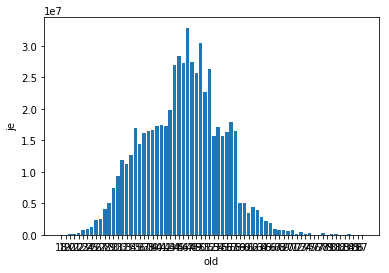

In [4]:
data_3=data_1.dropna(axis=0,subset=['kh'])
data_4=data_3[['kh','je']]
a=data_4.groupby('kh').sum()
b=pd.merge(a,jj,on='kh')
# print(b.info())
c=b[(15<b['old'])&(b['old']<90)]

d=c.groupby('old').sum()
# print(d)
je=[]
for i in d['je']:
    je.append(i)
old=[i for i in range(18,88)]
plt.bar(old,je)
plt.plot()
plt.xlabel('old')
plt.xticks(old)
plt.ylabel('je')
plt.show()

In [5]:
data_1=pd.read_excel("E:/Tipdm/data/cumcm2018c1.xlsx")
data_2=pd.read_csv("E:/Tipdm/data/cumcm2018c2.csv",engine='python',encoding='utf8')
data_1_1=data_1[['kh','xb']]      #取data_1的‘kh’列和‘xb’列
data_2_1=data_2[['kh','je']]

In [6]:
data=pd.merge(data_1_1,data_2_1,on='kh')          #将两表按‘kh’相同的合并在一起。取交集
data_dropna=data.dropna(axis=0,subset=['xb'])        #将‘xb’为空的行删除


In [7]:
data_people=data_dropna.groupby(['xb','kh']).sum()        #求男。女人数
data_je=data_dropna.groupby('xb').sum()          #求男性和女性的消费金额

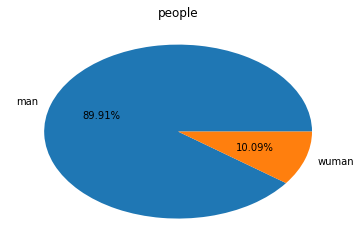

In [8]:
df=pd.DataFrame(data_people)           #将得到的DataframeGroupBy数据类型转化为Dataframe
finish=df.reset_index()               #重置索引
sex_0=finish[finish.xb==0]      #性别为男的数据
sex_1=finish[finish.xb==1]
x=[len(sex_0),len(sex_1)]          #len（）函数求出长度，即人数
plt.pie(x,labels=['man','wuman'],autopct='%1.2f%%')
plt.title('people')



# plt.pie(data_je['je'],labels=['man','wuman'],autopct='%1.2f%%')
# plt.title('je')

plt.show()

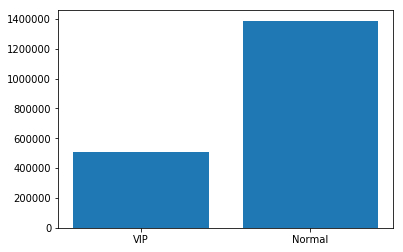

In [9]:
data_1_1=pd.DataFrame(data_1['kh'])
data_2_1=data_2[['kh','djh']]
data_VIP=pd.merge(data_1_1,data_2_1,on='kh',how='inner') #得到会员的消费信息
list=[]                                                   #创建一个空列表
for i in data_VIP['djh']:
    list.append(i)
list2=[]
for i in data_2_1['djh']:
    list2.append(i)
VIP_djs=len(list)            #用len()得出数据的数量。（其实直接len(data_2_1['djh'])就OK了）
normal_djs=len(list2)-VIP_djs             #分别是VIP的单据数和普通的单据数
y=[VIP_djs,normal_djs]
x=['VIP','Normal']
plt.bar(x,y)
plt.show()

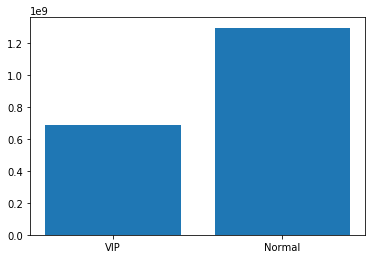

In [10]:
data_1_1=pd.DataFrame(data_1['kh'])
data_2_1=data_2[['kh','je']]
VIP_list=pd.merge(data_1_1,data_2_1,how='inner',on='kh')
VIP=VIP_list['je'].sum()              #会员消费金额
Normal=data_2_1['je'].sum()-VIP        #所有人的消费金额-会员消费金额=非会员消费金额
# print(int(VIP))
# print(int(Normal))

x=['VIP','Normal']
y=[VIP,Normal]
plt.bar(x,y)
plt.show()

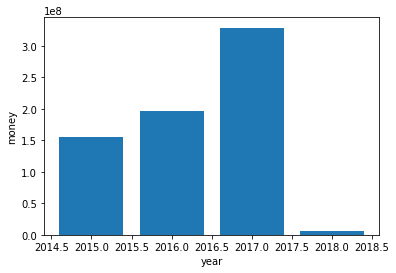

In [11]:
data_1_1=data_1[['kh','xb']]
data_2_1=data_2[['kh','dtime','je']]

VIP=pd.merge(data_1_1,data_2_1,how='inner',on='kh')
VIP['dtime']=pd.to_datetime(VIP['dtime'],errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')
#将object类型的时间转化为datatime类型，分别操作。errors=‘coerce’为强制转化，format为格式
VIP_1=VIP.copy()
#拷贝元数据，下面的操作无法在原数据上进行
VIP_1['dtime']=VIP['dtime'].dt.year     #将复杂的年月日重赋值，值为VIP['dtime‘]的年
a=VIP_1.groupby('dtime').sum()           #按年分组
je=a['je']
year=[2015,2016,2017,2018]

plt.bar(year,je)
plt.xlabel('year')
plt.ylabel('money')
plt.show()


<BarContainer object of 9 artists>

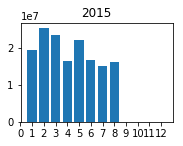

In [12]:
data_1_1=data_1[['kh','xb']]
data_2_1=data_2[['kh','dtime','je']]

VIP=pd.merge(data_1_1,data_2_1,how='inner',on='kh')
VIP['dtime']=pd.to_datetime(VIP['dtime'],errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')
VIP_1=VIP.copy()
VIP_1['year']=VIP_1['dtime'].dt.year       #新建列，值为VIP['dtime’]的年份，下同，为月份
VIP_1['month']=VIP_1['dtime'].dt.month
a=VIP_1.groupby(['year','month']).sum()     #按年，月进行分组求和
je=a['je']                                   #每年每月的营业额
#因为2015年只有9个月在营业。所以是je_2015=je[:9]，下同
je_2015=je[:9]
je_2016=je[9:20]
je_2017=je[20:32]
je_2018=je[32:33]
x1=[1,2,3,4,5,6,7,8,12]
x2=[1,3,4,5,6,7,8,9,10,11,12]
x3=[1,2,3,4,5,6,7,8,9,10,11,12]
x4=[1]
# print(je_2015,je_2016,je_2017,je_2018)
x=[i for i in range(13)]
plt.subplot(221)                          #画几幅图。（xyz）,画x*y副图，第z张图
plt.xticks(x)
plt.title(2015)
plt.bar(np.array(x1),je_2015,label='2015')

#plt.xticks(x)
#plt.show()

<BarContainer object of 11 artists>

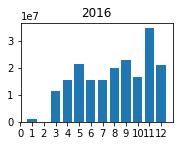

In [13]:
plt.subplot(222)
plt.xticks(x)
plt.title(2016)
plt.bar(np.array(x2),je_2016,label='2016')

<BarContainer object of 12 artists>

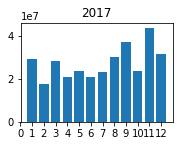

In [14]:
plt.subplot(223)
plt.xticks(x)
plt.title(2017)
plt.bar(np.array(x3),je_2017,label='2017')

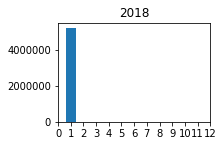

In [16]:
plt.subplot(224)
plt.xticks(x)
plt.title(2018)
plt.bar(np.array(x4),je_2018,label='2018')

plt.xticks(x)
plt.show()

54 72103 96774 106 56668


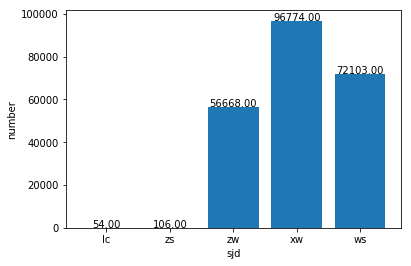

In [10]:
data_1_1=data_1[['kh','xb']]
data_2_1=data_2[['kh','dtime','djh']]

VIP=pd.merge(data_1_1,data_2_1,how='inner',on='kh')
VIP['dtime']=pd.to_datetime(VIP['dtime'],errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')
VIP_1=VIP.copy()
VIP_1['hour']=VIP_1['dtime'].dt.hour
sj_lc=VIP_1[(0<=VIP_1.hour) & (VIP_1.hour<6)]
sj_zs=VIP_1[(6<=VIP_1.hour) & (VIP_1.hour<10)]
sj_zw=VIP_1[(10<=VIP_1.hour) & (VIP_1.hour<14)]
sj_xw=VIP_1[(14<=VIP_1.hour) & (VIP_1.hour<18)]
sj_ws=VIP_1[(18<=VIP_1.hour) & (VIP_1.hour<23)]
# print(sj_lc.head())
# print(sj_zs.head())
# print(sj_zw.head())
# print(sj_xw.head())
# print(sj_ws.head())
num_lc=len(sj_lc.groupby(['djh','kh']).sum())     #将一天划分为凌晨，早上，中午，下午，晚上。len（）函数求长度
num_zs=len(sj_zs.groupby(['djh','kh']).sum())

num_zw=len(sj_zw.groupby(['djh','kh']).sum())
num_ws=len(sj_ws.groupby(['djh','kh']).sum())
num_xw=len(sj_xw.groupby(['djh','kh']).sum())


print(num_lc,num_ws,num_xw,num_zs,num_zw)
x=['lc','zs','zw','xw','ws']
y=[num_lc,num_zs,num_zw,num_xw,num_ws]
plt.bar(x,y)
plt.xlabel('sjd')                     #sjd为时间段
plt.ylabel('number')
for x,y in zip(x,y):                   #for循环用于显示条形统计图的每个部分的最大值
    plt.text(x,y+1,'%.2f'%y,horizontalalignment='center')
plt.show()

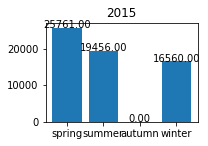

In [10]:
data_1_1=data_1[['kh','xb']]
data_2_1=data_2[['kh','dtime','djh']]

VIP=pd.merge(data_1_1,data_2_1,how='inner',on='kh')
VIP['dtime']=pd.to_datetime(VIP['dtime'],errors='coerce',format='%Y/%m/%d %H:%M:%S.%f')
VIP_1=VIP.copy()
VIP_1['year']=VIP_1['dtime'].dt.year
VIP_1['month']=VIP_1['dtime'].dt.month
x=['spring','summer','autumn','winter']
sj_2015=VIP_1[VIP_1.year==2015]
sj_2015_spring=sj_2015[(sj_2015.month>=3)&(sj_2015.month<=5)]
sj_2015_summer=sj_2015[(sj_2015.month>=6)&(sj_2015.month<=8)]
sj_2015_autumn=sj_2015[(sj_2015.month>=9)&(sj_2015.month<=11)]
sj_2015_winter=sj_2015[(sj_2015.month==12)|(sj_2015.month<=2)]
y1_2015=len(sj_2015_spring.groupby(['kh','djh']))
y2_2015=len(sj_2015_summer.groupby(['kh','djh']))
y3_2015=len(sj_2015_autumn.groupby(['kh','djh']))
y4_2015=len(sj_2015_winter.groupby(['kh','djh']))
y1=[y1_2015,y2_2015,y3_2015,y4_2015]
plt.subplot(221)
plt.title(2015)

plt.bar(x,y1)
for x,y in zip(x,y1):
    plt.text(x,y+1,'%.2f'%y,horizontalalignment='center')


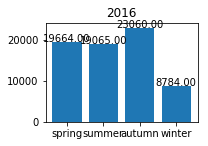

In [11]:
sj_2016=VIP_1[VIP_1.year==2016]
sj_2016_spring=sj_2016[(sj_2016.month>=3)&(sj_2016.month<=5)]
sj_2016_summer=sj_2016[(sj_2016.month>=6)&(sj_2016.month<=8)]
sj_2016_autumn=sj_2016[(sj_2016.month>=9)&(sj_2016.month<=11)]
sj_2016_winter=sj_2016[(sj_2016.month==12)|(sj_2016.month<=2)]
y1_2016=len(sj_2016_spring.groupby(['kh','djh']))
y2_2016=len(sj_2016_summer.groupby(['kh','djh']))
y3_2016=len(sj_2016_autumn.groupby(['kh','djh']))
y4_2016=len(sj_2016_winter.groupby(['kh','djh']))
y2=[y1_2016,y2_2016,y3_2016,y4_2016]
plt.subplot(222)
plt.title(2016)
x1=['spring','summer','autumn','winter']
plt.bar(x1,y2)
for x,y in zip(x1,y2):
    plt.text(x,y+1,'%.2f'%y,horizontalalignment='center')


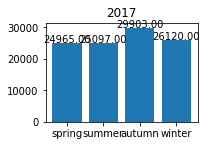

In [13]:
sj_2017=VIP_1[VIP_1.year==2017]
sj_2017_spring=sj_2017[(sj_2017.month>=3)&(sj_2017.month<=5)]
sj_2017_summer=sj_2017[(sj_2017.month>=6)&(sj_2017.month<=8)]
sj_2017_autumn=sj_2017[(sj_2017.month>=9)&(sj_2017.month<=11)]
sj_2017_winter=sj_2017[(sj_2017.month==12)|(sj_2017.month<=2)]
y1_2017=len(sj_2017_spring.groupby(['kh','djh']))
y2_2017=len(sj_2017_summer.groupby(['kh','djh']))
y3_2017=len(sj_2017_autumn.groupby(['kh','djh']))
y4_2017=len(sj_2017_winter.groupby(['kh','djh']))
y3=[y1_2017,y2_2017,y3_2017,y4_2017]
plt.subplot(223)
plt.title(2017)
x2=['spring','summer','autumn','winter']

plt.bar(x2,y3)

for x,y in zip(x2,y3):
    plt.text(x,y+1,'%.2f'%y,horizontalalignment='center')

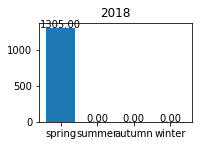

In [12]:
sj_2018=VIP_1[VIP_1.year==2018]
sj_2018_winter=sj_2018[(sj_2018.month==12)|(sj_2018.month<=2)]
y1_2018=len(sj_2018_winter.groupby(['kh','djh']))
y4=[y1_2018,0,0,0]
plt.subplot(224)
plt.title(2018)
x3=['spring','summer','autumn','winter']

plt.bar(x3,y4)

for x,y in zip(x3,y4):
    plt.text(x,y+1,'%.2f'%y,horizontalalignment='center')
plt.show()